# **Abstract:**

The purpose of this study is to develop a system for detecting adult income levels. The UCI adult income dataset will be utilized, which includes information on 32,561 individuals and various demographic and employment-related features. 

# **Aim:**

In this assignment we aim to create a complete ML project with

Checking Data Quality

Feature Selection

Modeling - Training Models, Selecting Best Model, Hyperparameter Tuning

Model Interpretibility

Reports and Visualizations

## What did you do?

For this task, we completed four major steps.

First, we performed data cleaning and normalization to prevent overfitting by using a correlation matrix to identify multicollinearity and scaling the data. 

Secondly, we used the same correlation matrix to select features that had a significant positive or negative relationship with our output variable, "income_bracket." 

Thirdly, we utilized various models, such as a linear classifier model, decision tree, and autoML to determine the best performance. 

To further enhance performance, we optimized the hyperparameters using grid search, a feature of H2O. 

Lastly, we utilized interpretability to understand the model's prediction based on input. We used SHAP analysis to determine the significance of input variables and their respective outputs. To do this, we utilized SHAP Summary, SHAP Waterfall, and SHAP Dependence Plot. By doing so, we were able to identify the degree of positive or negative impact of various variables.

In [4]:
import pandas as pd
!pip install h2o
!pip install shap
!pip install lime
import shap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
from tabulate import tabulate
from h2o.automl import H2OAutoML
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn_pandas import DataFrameMapper
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.6/177.6 MB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.40.0.3-py2.py3-none-any.whl size=177694727 sha256=ed55789b4a85bd809a057aa7f5c52b835b8dd1608febdd9e63b0e99192f505bf
  Stored in directory: /root/.cache/pip/wheels/9a/54/b6/c9ab3e71309ef0000bbe39e715020dc151bbfc557784b7f4c9
Successfully built h2o
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 15.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 KB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283859 sha256=ebdcd0ee4

## Reading the dataset

In [5]:
data = pd.read_csv("https://raw.githubusercontent.com/aditya3422/DataScienceMethodsAndTools/main/adult-training.csv")

In [6]:
data_change = {' <=50K':0, ' >50K': 1}
data.income_bracket = [data_change[item] for item in data.income_bracket.astype(str)]
print(data.income_bracket.value_counts())
data.head()

0    24720
1     7841
Name: income_bracket, dtype: int64


,Age,workclass,fnlwgt,education,education_num,marital status,occupation,relationship,race,gender,capital_gain,captial_loss,hours_per_week,native_country,income_bracket
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   gender          32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  captial_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income_bracket  32561 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


# Cleaning the data

In [8]:
data.isnull().sum()

Age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital status    0
occupation        0
relationship      0
race              0
gender            0
capital_gain      0
captial_loss      0
hours_per_week    0
native_country    0
income_bracket    0
dtype: int64

<Axes: >

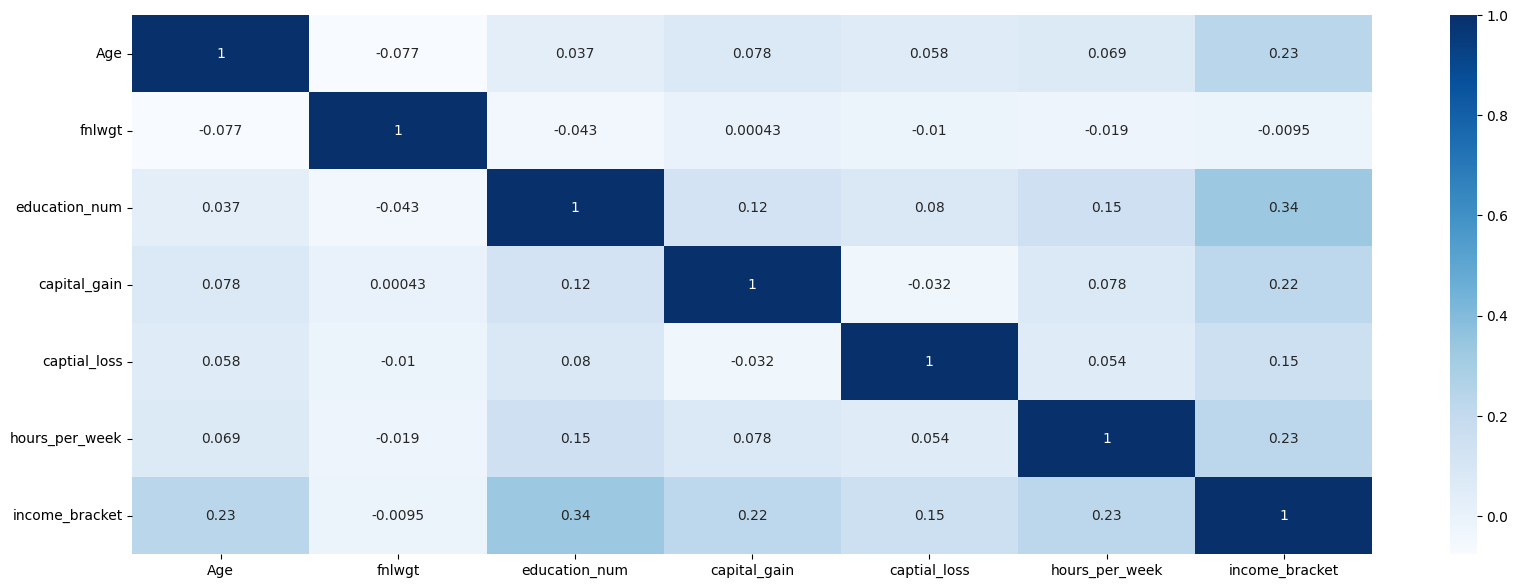

In [43]:
#the heat map of the correlation
plt.figure(figsize=(20,7))
sns.heatmap(data.corr(), annot=True, cmap='Blues')

In [44]:
data.corr()

,Age,fnlwgt,education_num,capital_gain,captial_loss,hours_per_week,income_bracket
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.234037
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768,-0.009463
education_num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123,0.335154
capital_gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409,0.223329
captial_loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256,0.150526
hours_per_week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000,0.229689
income_bracket,0.234037,-0.009463,0.335154,0.223329,0.150526,0.229689,1.000000


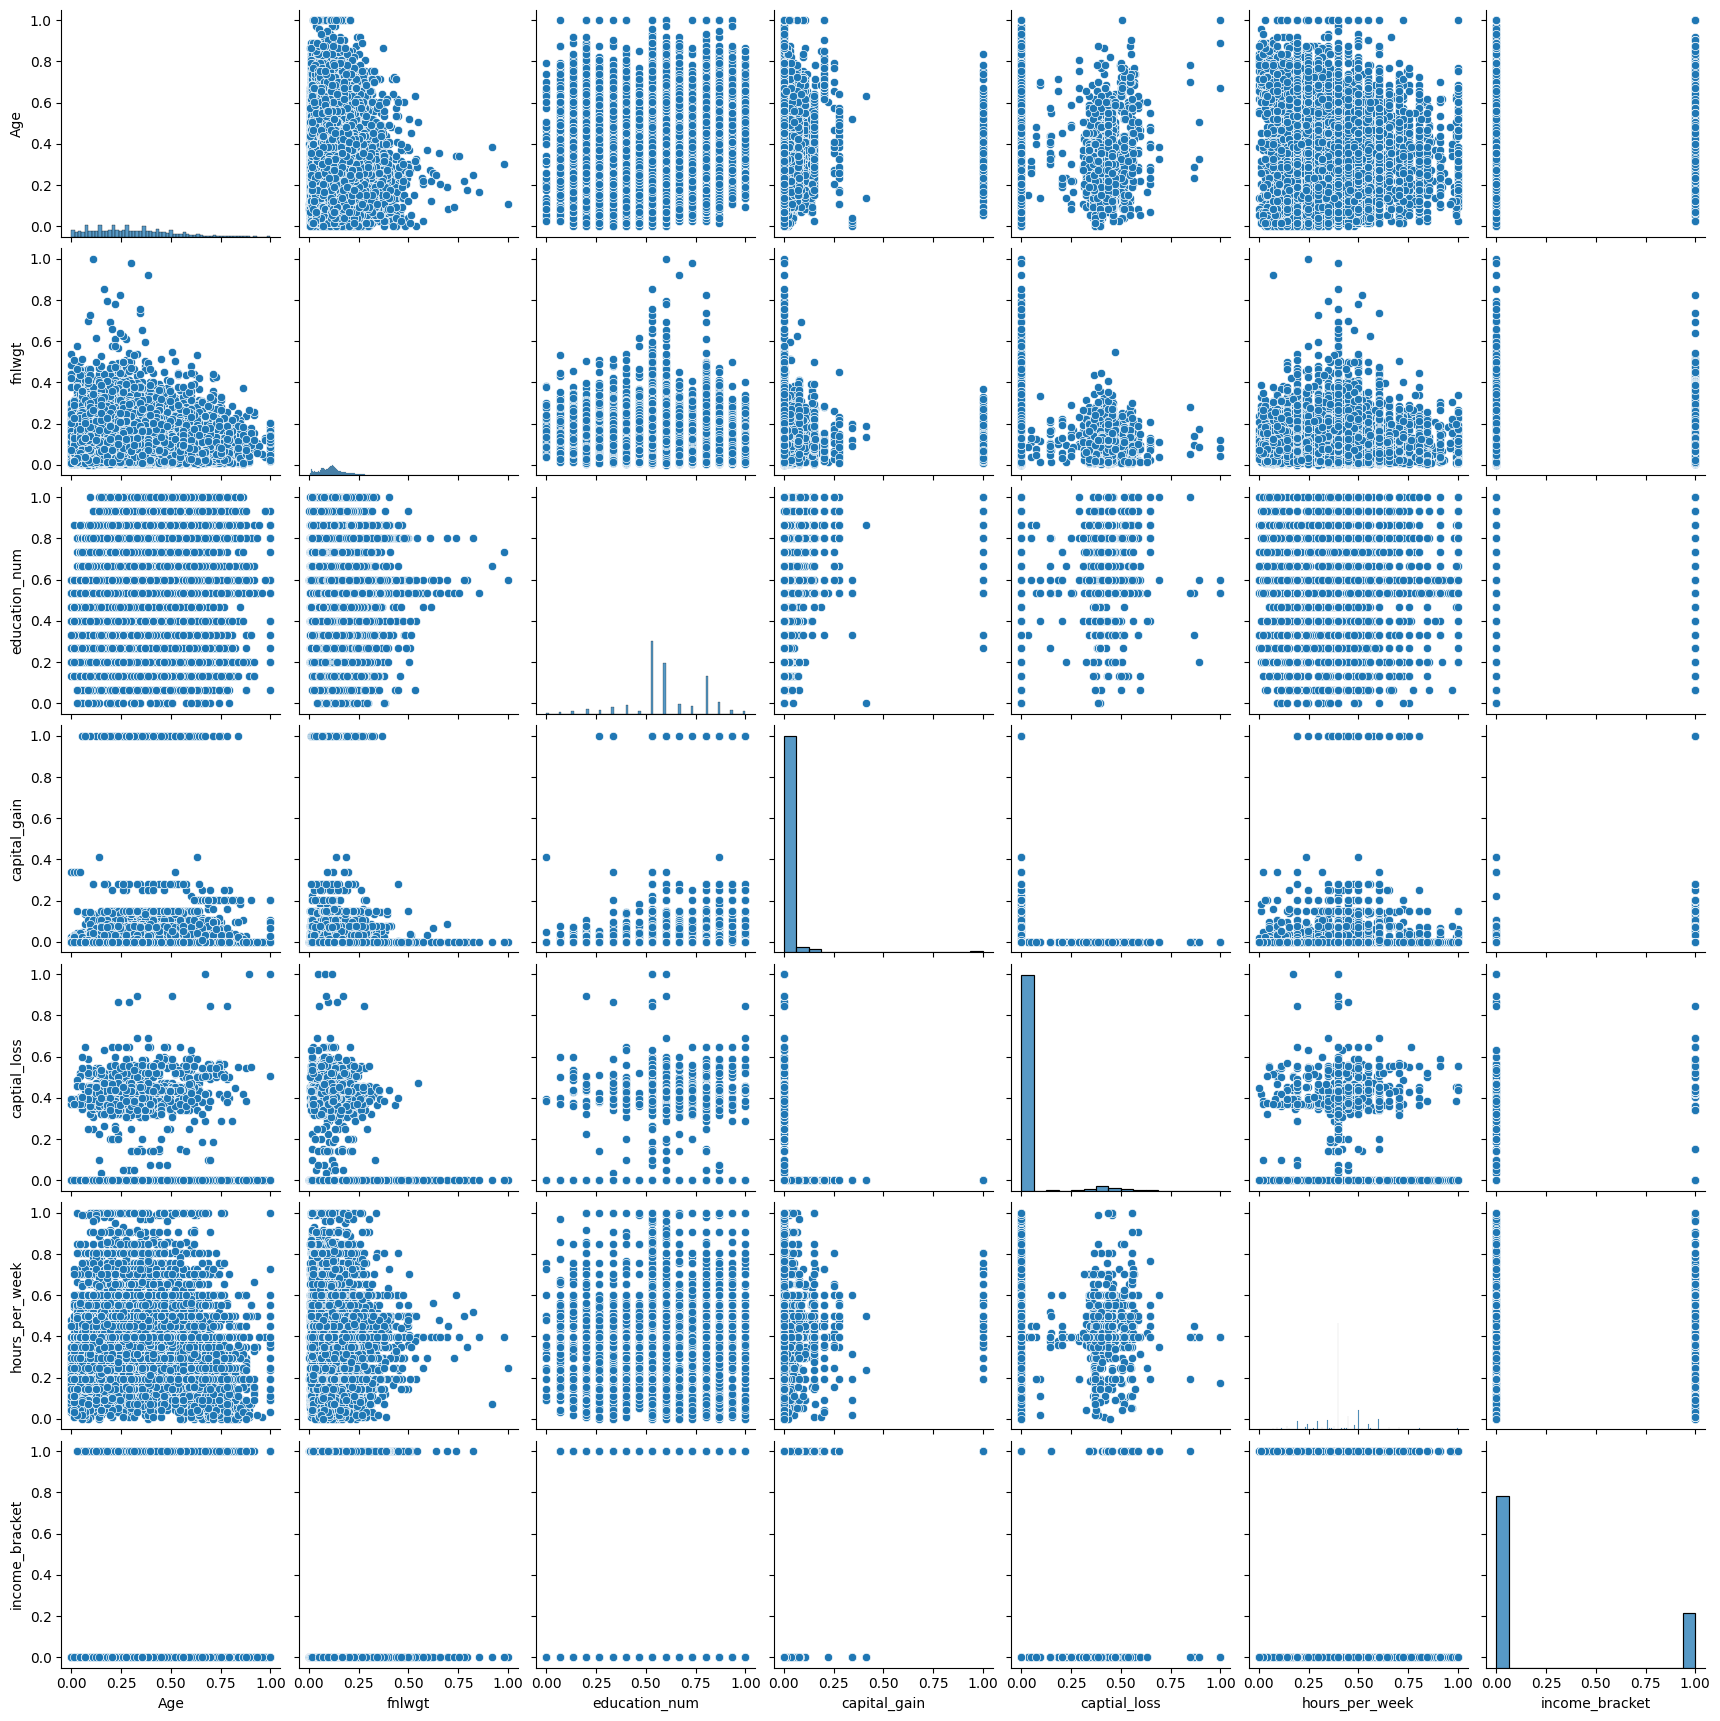

In [45]:
sns.pairplot(data)

we can see there are lot of co-relation among the variables. The co-relation between income_bracket and education_num being the highest (0.34), it may mean that essentially both are measuring or predicting same thing

## QQ Plot

<Figure size 800x500 with 0 Axes>

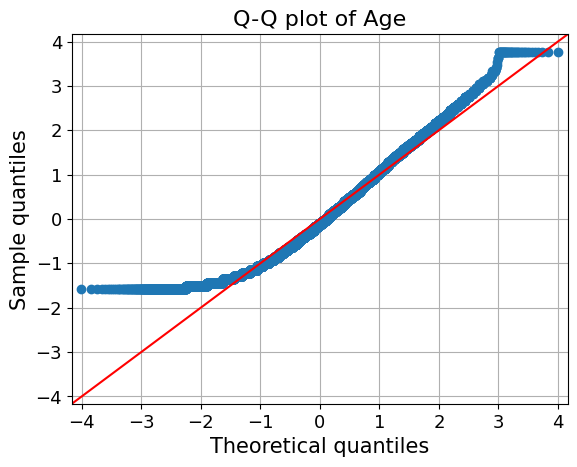

<Figure size 800x500 with 0 Axes>

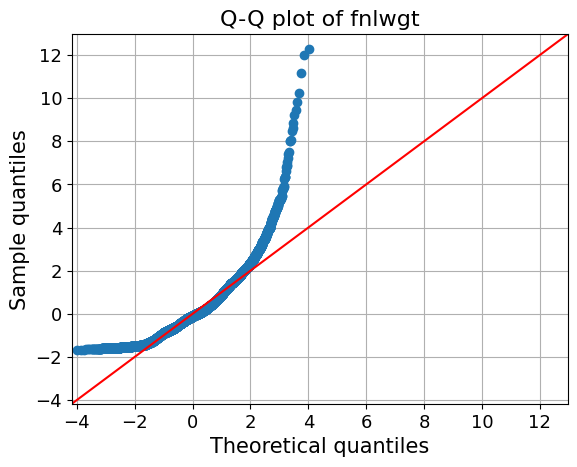

<Figure size 800x500 with 0 Axes>

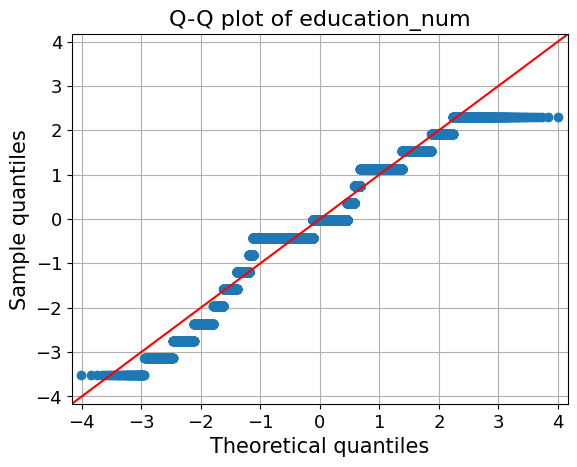

<Figure size 800x500 with 0 Axes>

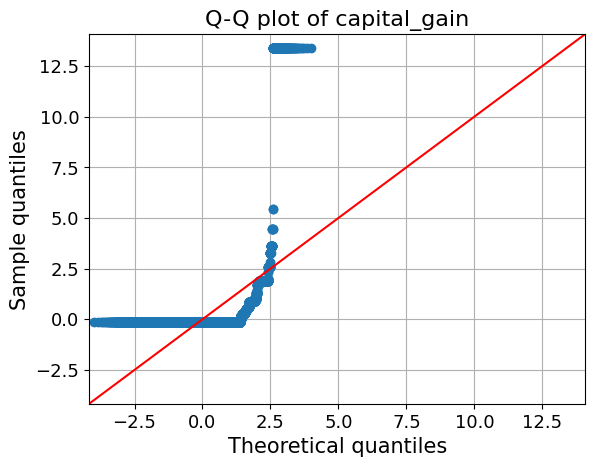

<Figure size 800x500 with 0 Axes>

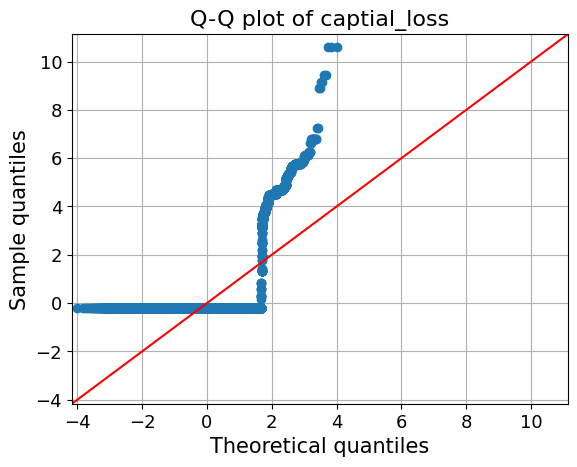

<Figure size 800x500 with 0 Axes>

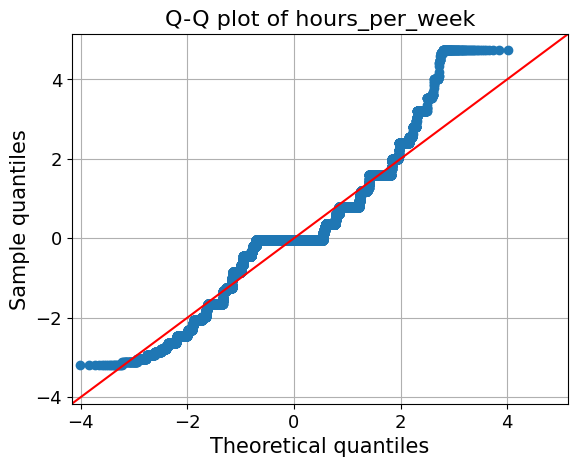

<Figure size 800x500 with 0 Axes>

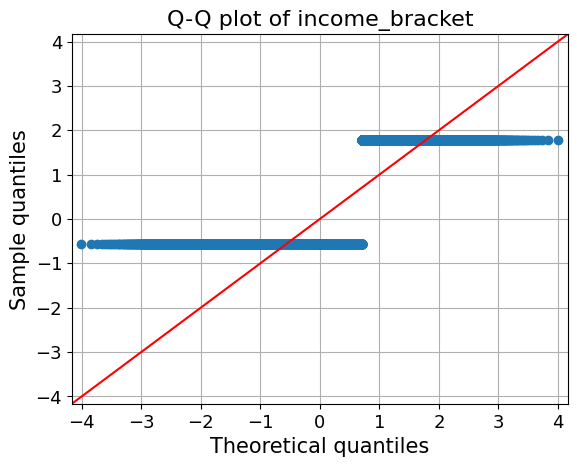

In [9]:
from statsmodels.graphics.gofplots import qqplot
data_norm=data[['Age', 'fnlwgt', 'education_num', 'capital_gain', 'captial_loss',
       'hours_per_week','income_bracket']]
for c in data_norm.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(data_norm[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()

A QQ plot allows you to visually compare the distribution of your data to a theoretical distribution and assess how closely your data follows that distribution. The closer the points on the QQ plot are to a straight line, the more closely your data follows the theoretical distribution. 


|Column name | Distributions|
|------------|:-------------|
| Age        | Continuous distribution|
| fnlwgt | Exponential distribution|
| education_num| Step distribution |
| capital_gain| Right skewed distribution|
| capital_loss| Right skewed distribution|
| hours_per_week| Uniform distribution|
| income_bracket| Step distribution|


# Data Normalization

<Axes: >

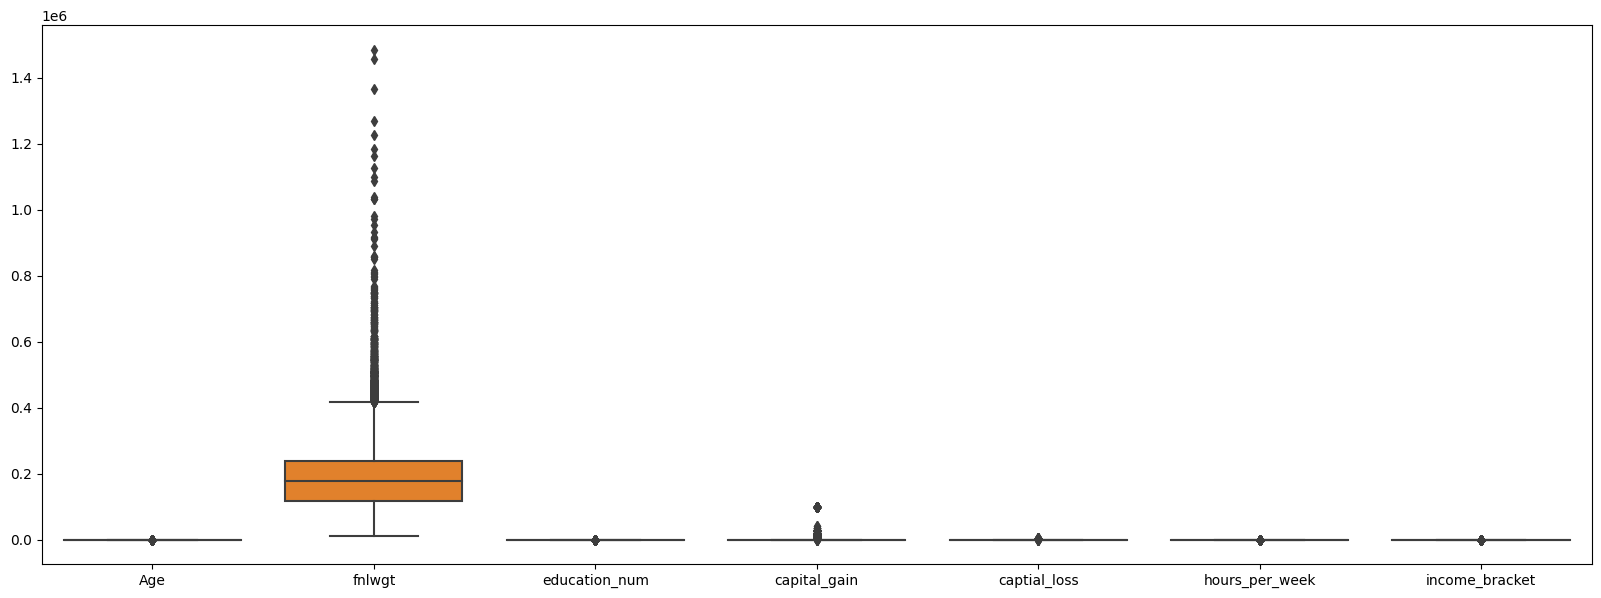

In [10]:
#Checking the Ranges of the predictor variables and dependent variable
plt.figure(figsize=(20,7))
sns.boxplot(data=data)

Normalising the data for fnlwgt column beacuse the value is too high when compared to other independent variable

<Axes: >

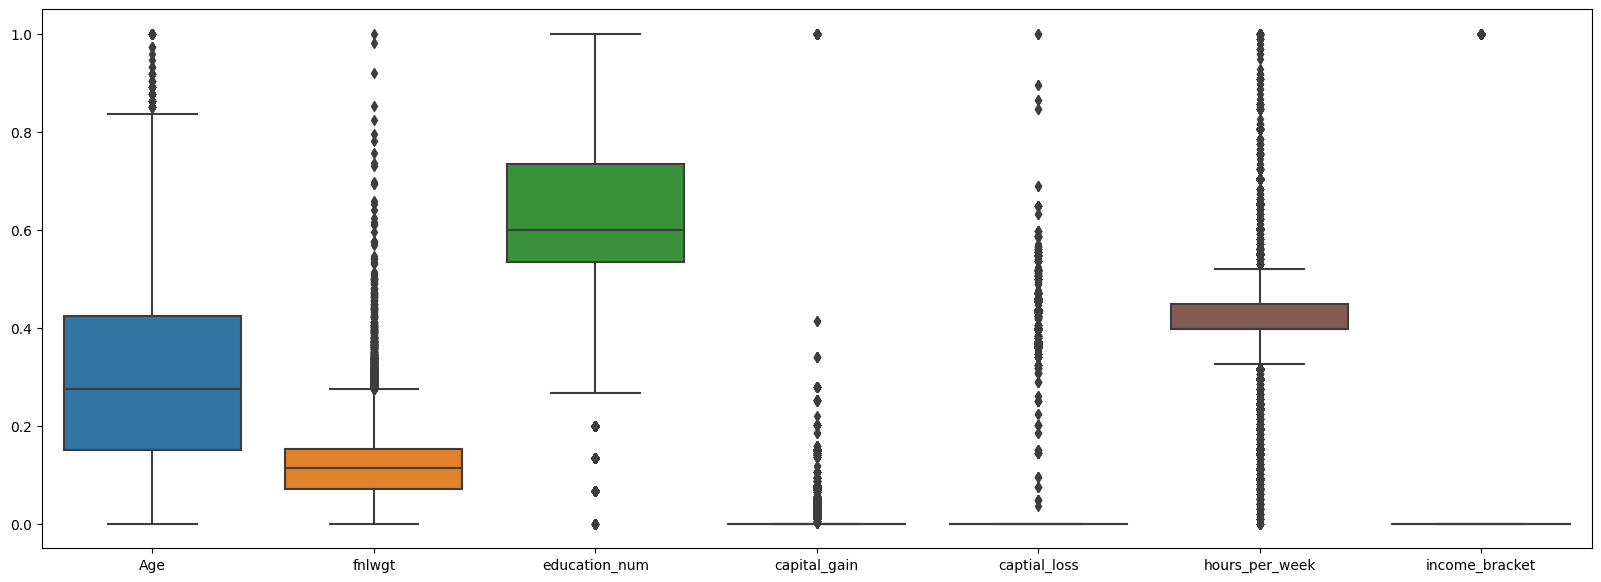

In [11]:
data = pd.get_dummies(data_norm)

# Normalizing the data in the fnlwgt column beacuse the value is too high when compared to other independent variable

from sklearn import preprocessing
xA = data[['Age']].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
xA_scaled = min_max_scaler.fit_transform(xA)
data[['Age']] = pd.DataFrame(xA_scaled)

xE = data[['education_num']].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
xE_scaled = min_max_scaler.fit_transform(xE)
data[['education_num']] = pd.DataFrame(xE_scaled)

xC = data[['capital_gain']].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
xC_scaled = min_max_scaler.fit_transform(xC)
data[['capital_gain']] = pd.DataFrame(xC_scaled)

xCL = data[['captial_loss']].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
xCL_scaled = min_max_scaler.fit_transform(xCL)
data[['captial_loss']] = pd.DataFrame(xCL_scaled)

xH = data[['hours_per_week']].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
xH_scaled = min_max_scaler.fit_transform(xH)
data[['hours_per_week']] = pd.DataFrame(xH_scaled)

xG = data[['income_bracket']].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
xG_scaled = min_max_scaler.fit_transform(xG)
data[['income_bracket']] = pd.DataFrame(xG_scaled)

xF = data[['fnlwgt']].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
xF_scaled = min_max_scaler.fit_transform(xF)
data[['fnlwgt']] = pd.DataFrame(xF_scaled)

plt.figure(figsize=(20,7))
sns.boxplot(data=data)

As seen above, min-max sclaing has no effect, as the data already seems to be scaled in. Scaling does not seem to have significant effect.

Without min-max scaling the box-plot seems to be scaled.

In [12]:
y = data.income_bracket
x = data.drop(['income_bracket'], axis = 1)  #Dropping column y
print(x.columns)
print(y)

Index(['Age', 'fnlwgt', 'education_num', 'capital_gain', 'captial_loss',
       'hours_per_week'],
      dtype='object')
0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
32556    0.0
32557    1.0
32558    0.0
32559    0.0
32560    1.0
Name: income_bracket, Length: 32561, dtype: float64


## OLS Summary
To gain a deeper insight into whether there is a relationship between the x and y values, we can utilize the OLS Summary. The null hypothesis is employed to determine whether or not there is any correlation between the x and y values. We can inspect the F-Statistic of the OLS Summary to determine this. A value of 0 indicates no relationship between the x and y values, whereas a value greater than 0 implies the existence of a relationship. The strength of the relationship between the x and y values increases with a higher F-statistic value

In [13]:
import statsmodels.api as sm

model = sm.OLS(data['income_bracket'], data[['Age', 'fnlwgt', 'education_num', 'capital_gain', 'captial_loss',
       'hours_per_week']]).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         income_bracket   R-squared (uncentered):                   0.366
Model:                            OLS   Adj. R-squared (uncentered):              0.365
Method:                 Least Squares   F-statistic:                              3126.
Date:                Mon, 10 Apr 2023   Prob (F-statistic):                        0.00
Time:                        02:31:26   Log-Likelihood:                         -15615.
No. Observations:               32561   AIC:                                  3.124e+04
Df Residuals:                   32555   BIC:                                  3.129e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Age                0.2801      0.011     24.967      0.000       0.258       0.302
fnlwgt            -0.4513      0.028    -16.103      0.000      -0.506      -0.396
education_num      0.2918      0.010     28.721      0.000       0.272       0.312
capital_gain       1.1261      0.030     38.132      0.000       1.068       1.184
captial_loss       0.5896      0.024     25.046      0.000       0.543       0.636
hours_per_week     0.0814      0.015      5.443      0.000       0.052       0.111
==============================================================================
Omnibus:                     4898.531   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7279.171
Skew:                           1.148   Prob(JB):                         0.00
Kurtosis:                       2.691   Cond. No.                         11.2
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Based on the information presented above, we can observe that the F-Statistic value is not equal to 0, which indicates that there is a relationship between the X and Y values.

Additionally, we can analyze the T-Statistic values and identify that certain values have a significant impact on the outcome in either a positive or negative direction. To explore this further, we can utilize SHAP analysis.

Moving forward, we will implement a simple Linear Regressor model and conduct SHAP analysis on it.

##What is the question?

In this dataset we are trying to predict the income bracket of a person, based on the input values. For this we can use Null Hypothesis to state if there is a relationship between the input and output variables. 

As seen in the above OLS summary the F-Statistic value is not equal to 0, which indicates that there is a relationship between X and Y.

# Linear Regression

       Y_Predictions  Y_actual
0           0.206771       0.0
1           0.636768       0.0
2           0.572129       0.0
3           0.079964       0.0
4           0.047503       0.0
...              ...       ...
24415       0.322976       1.0
24416       0.245065       0.0
24417       0.333615       0.0
24419       0.324315       1.0
24420       0.135983       0.0

[18278 rows x 2 columns]
[0.46613346 0.0498356  0.66349155 0.9919933  0.56221552 0.5688865 ]
      ColumnNames  Coefficients
0             Age      0.466133
1          fnlwgt      0.049836
2   education_num      0.663492
3    capital_gain      0.991993
4    captial_loss      0.562216
5  hours_per_week      0.568886
The mean squared error is: 0.22421086501021867
The R^2 score on train data is: 0.23293959097207328
      ColumnNames  Coefficients
0             Age      0.466133
1          fnlwgt      0.049836
2   education_num      0.663492
3    capital_gain      0.991993
4    captial_loss      0.562216
5  hours_per_week  

<Axes: >

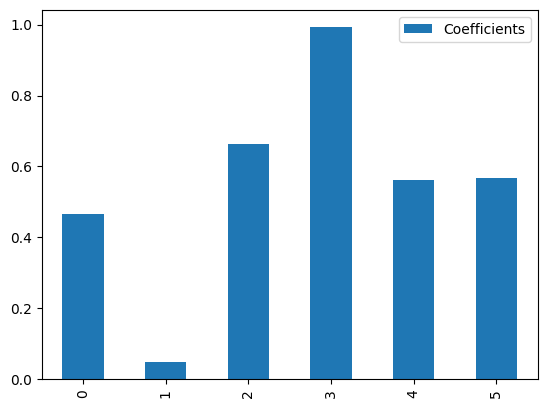

In [14]:
from sklearn.metrics import r2_score, mean_squared_error 
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model

df = data[['Age', 'fnlwgt', 'education_num', 'capital_gain', 'captial_loss',
       'hours_per_week','income_bracket']]

x = df.drop(['income_bracket'], axis = 1)
y = df.income_bracket
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.25,shuffle = True)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x_train,y_train)
regr.coef_

analysis = pd.DataFrame()
analysis['Y_Predictions'] = regr.predict(x_test)
analysis['Y_actual'] = y_test
analysis = analysis.dropna()
print(analysis)

print(regr.coef_)
#ax = x_train.plot.bar(y = lregr.coef_)
pad = pd.DataFrame()
pad['ColumnNames'] = x_train.columns.values
pad['Coefficients'] = regr.coef_

print(pad)


print("The mean squared error is: {}".format(mean_squared_error(analysis['Y_actual'], analysis['Y_Predictions'])))
print("The R^2 score on train data is: {}".format(regr.score(x_train, y_train)))
print(pad)
pad.plot.bar()

SHAP (SHapley Additive exPlanations) analysis is a technique utilized to interpret machine learning models by computing the contribution of each feature to the prediction. It explains the output of a model and provides a way to estimate the importance of each feature in the model's output for a particular instance.

To perform the SHAP analysis on our linear model, we will plot model summaries, employ waterfall analysis to identify the significance of features and their impact on the final prediction, utilize feature importance to assess all the values of the model, implement dependence plots to exhibit how values are dependent on each other, and employ a heatmap to visualize the contribution of each feature to the final prediction made by the model for better comprehension.

### Shap analysis of Linear Model

Exact explainer: 8141it [01:22, 98.25it/s]                           


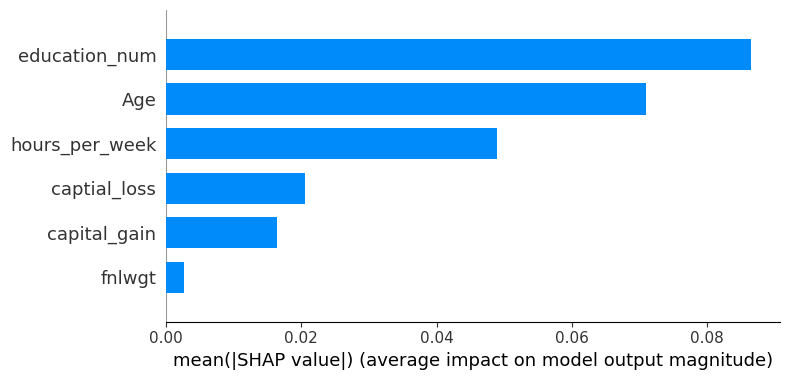

In [15]:
linear_explainer_shap = shap.Explainer(regr.predict, x_train)
shap_values_linear_regression = linear_explainer_shap(x_train)
shap.summary_plot(shap_values_linear_regression, x_train, plot_type = 'bar', max_display=14)


From above, we can see that the distribution of shaply values is more for education_num. However, to determine the positive and negative importance of the values we will not specify the plot type as bar and just see the summary of the shap values.

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


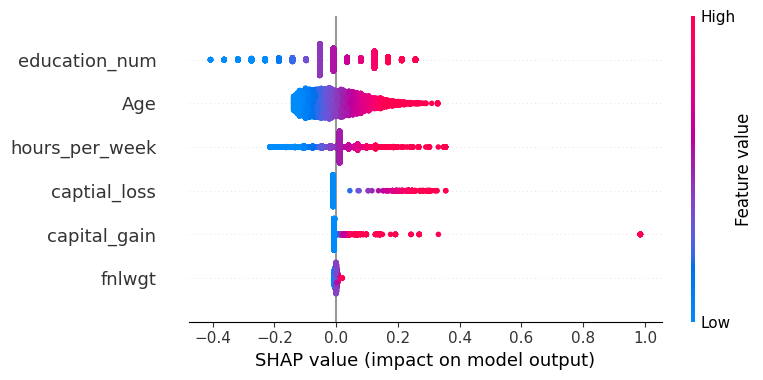

In [16]:
shap.summary_plot(shap_values_linear_regression, x_train, max_display = 14)

But For the same parameter i.e education_num, if the value becomes lower, it impacts the prediction of the model more negatively than in a positive manner. 


> We can see that in the graph, the red dots indicate high impact and blue showcase less impact. The direction from the mean line in the center indicates type of impact on the model's output value.

The only value that seems to have a clear positive impact the higher it become is Age.

Waterfall analysis:

Waterfall plot for linear regression


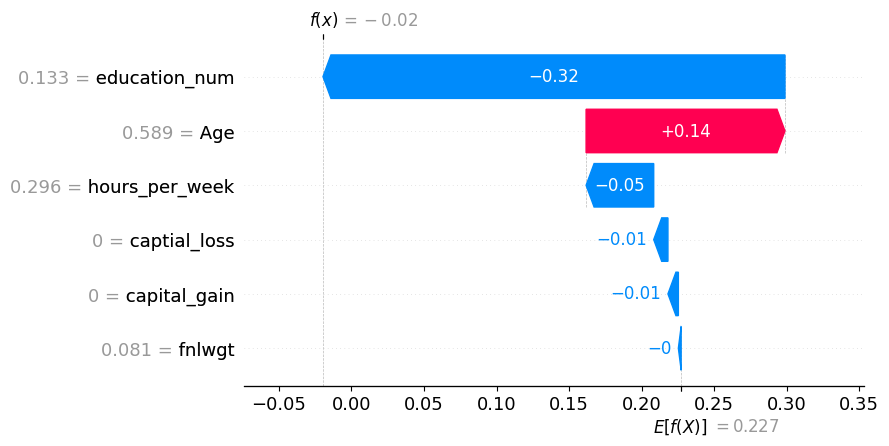

In [17]:
print("Waterfall plot for linear regression")
shap.plots.waterfall(shap_values_linear_regression[30], max_display = 14)

Now where the above summary plot gave the general distribution of shap valuese, the waterfall plot is used to see for one single instance of the data which value has a positive and negative impact on the output value. This is better to further analyze variable importance at per instance level.

## Feature importance plot:
The feature importance plot displayed below differs from the SHAP waterfall plot in that it examines the significance of each feature across all instances in the dataset, rather than analyzing the contributions of individual features to a single prediction. This SHAP feature importance plot is presented as a bar chart, with the most crucial features listed at the top.

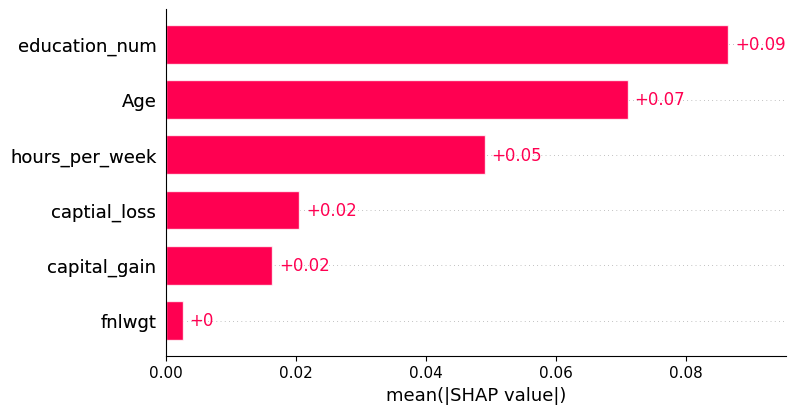

In [18]:
shap.plots.bar(shap_values_linear_regression)

### SHAP Dependance plots

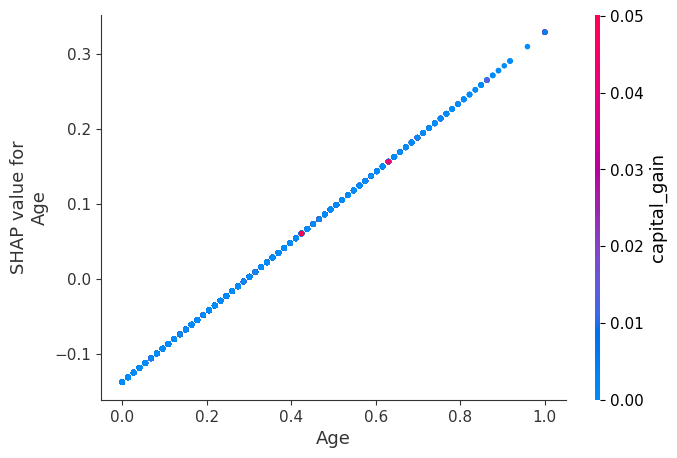

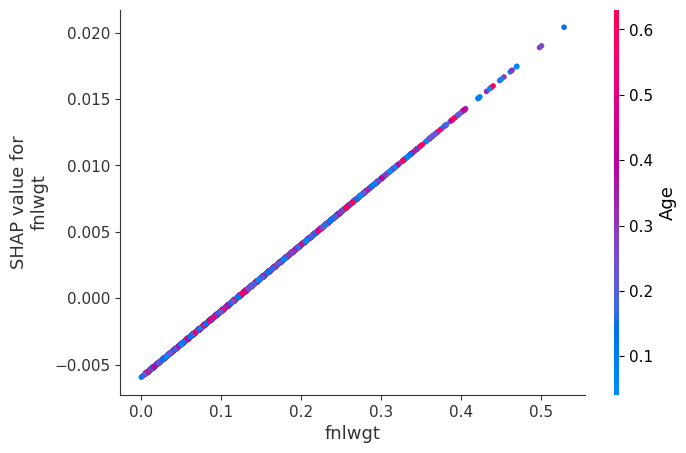

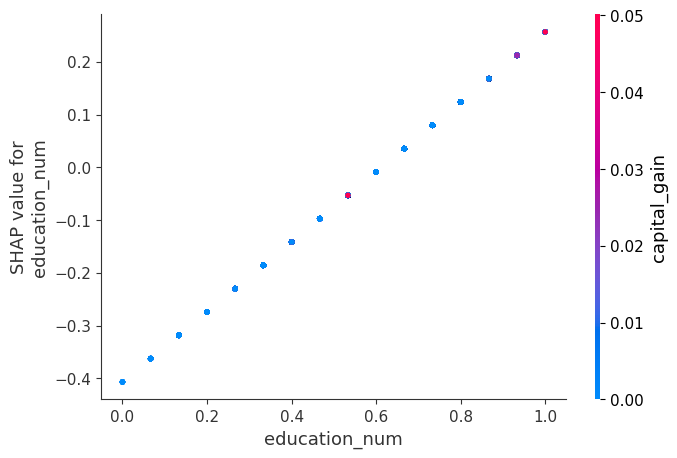

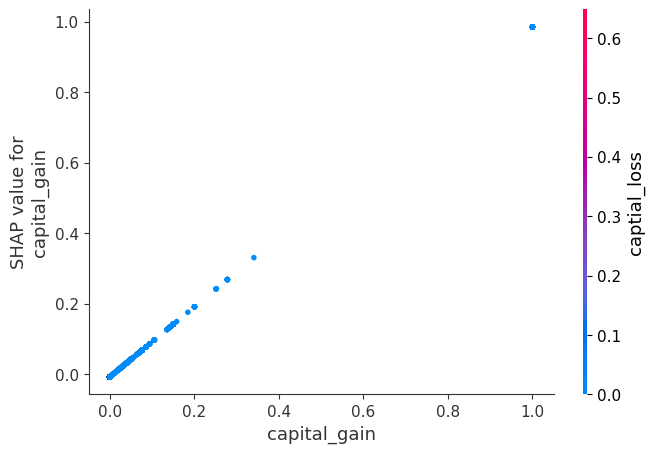

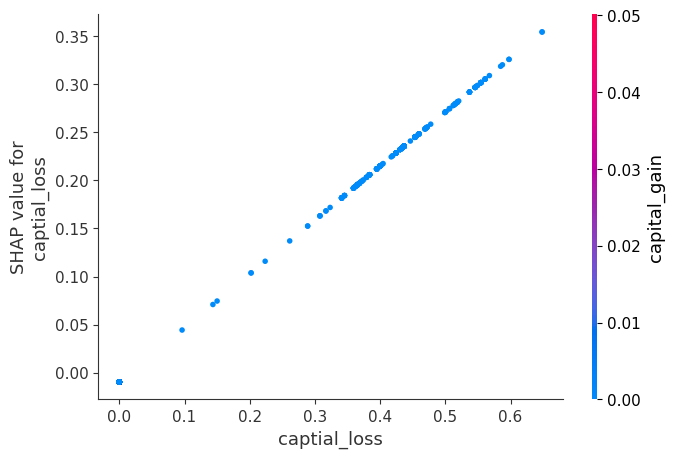

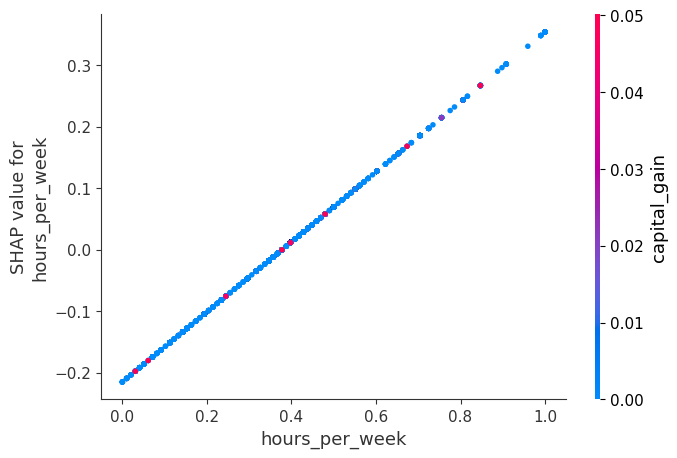

In [19]:
# To get dependance plots for all the columns present in the database, we iterate over the columns and priovide the dependance plots.
for i in x_train.columns:
  shap.dependence_plot(i, shap_values_linear_regression.values, x_train)

SHAP dependence plots are a visualization tool that illustrates the impact of a specific feature on a model's predictions. They provide insights into the relationship between the feature and the target variable and how this connection changes depending on the values of other features in the dataset.

To generate a SHAP dependence plot, a scatter plot is created with the feature values and their corresponding SHAP values for each instance in the dataset. The plot showcases how the feature value and SHAP value are interlinked, with each point's color indicating the value of another feature in the dataset. This type of plot can be helpful for gaining a deeper understanding of how different features influence the model's output.

##Decision Tree

       Y_Predictions  Y_actual
0           0.104027       0.0
1           1.000000       0.0
2           0.347313       0.0
3           0.104027       0.0
4           0.091846       0.0
...              ...       ...
24415       0.347313       1.0
24416       0.104027       0.0
24417       0.200000       0.0
24419       0.230189       1.0
24420       0.091846       0.0

[18278 rows x 2 columns]
The mean squared error is: 0.24608762700555406
The R^2 score on train data is: 0.23293959097207328
[0.10402685 1.         0.34731324 ... 0.34731324 0.23018868 0.0918463 ]


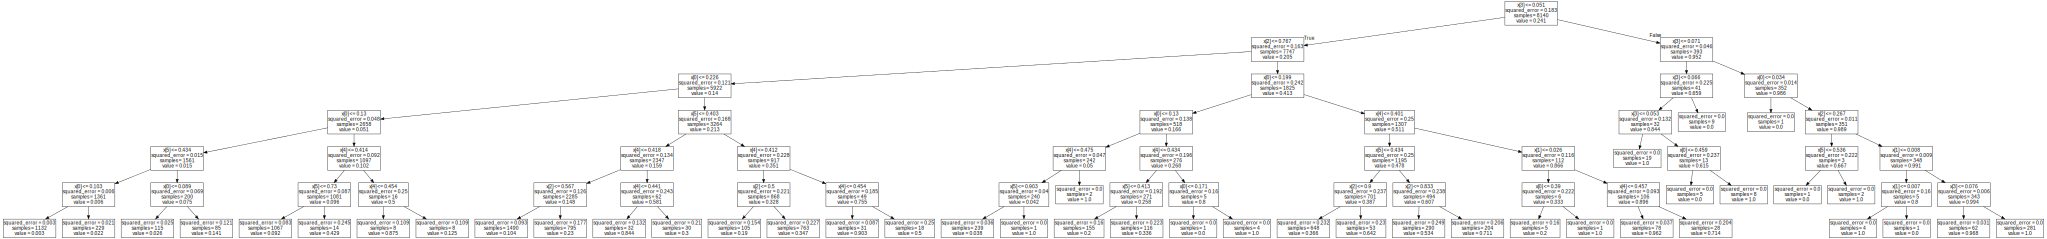

In [20]:
from sklearn import tree
import graphviz

regressor = tree.DecisionTreeRegressor(random_state=1, max_depth=6)
regressor = regressor.fit(x_train, y_train)
predictions = regressor.predict(x_test)
analysis = pd.DataFrame()
analysis['Y_Predictions'] = predictions
analysis['Y_actual'] = y_test
analysis = analysis.dropna()
print(analysis)

print("The mean squared error is: {}".format(mean_squared_error(analysis['Y_actual'], analysis['Y_Predictions'])))
print("The R^2 score on train data is: {}".format(regr.score(x_train, y_train)))
explainer = shap.TreeExplainer(regressor)
shap_values_decision_tree = explainer.shap_values(x_test)
#shap.summary_plot(shap_values_decision_tree, x_test, plot_type="bar")

predictions = regressor.predict(x_test)
print(predictions)

### Visualizing the decision tree graph.
dot_data = tree.export_graphviz(regressor, out_file=None)
graph = graphviz.Source(dot_data)
graph

### Shap analysis (For decision tree)

Exact explainer: 8141it [00:34, 164.51it/s]                          


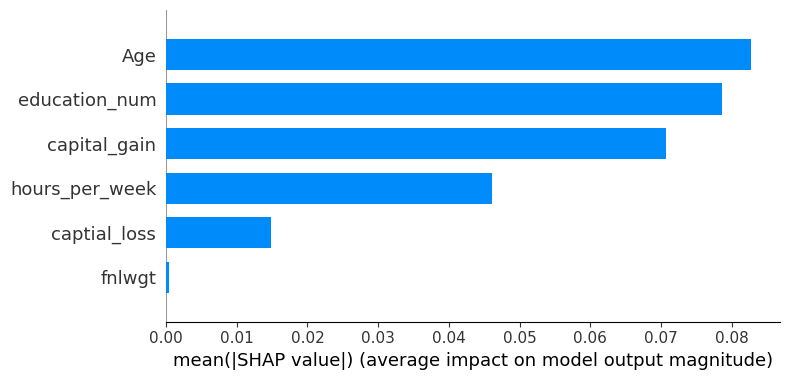

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


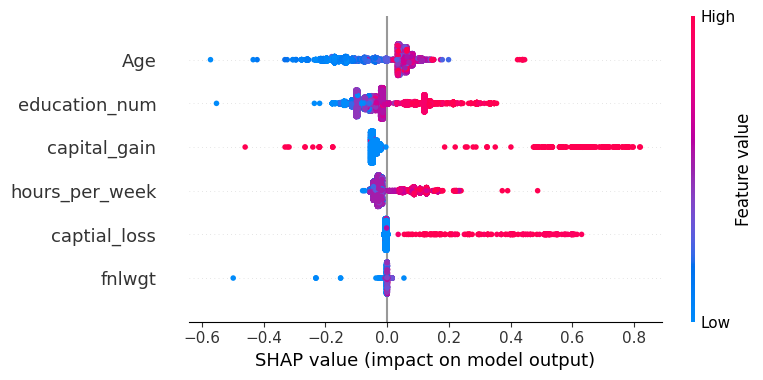

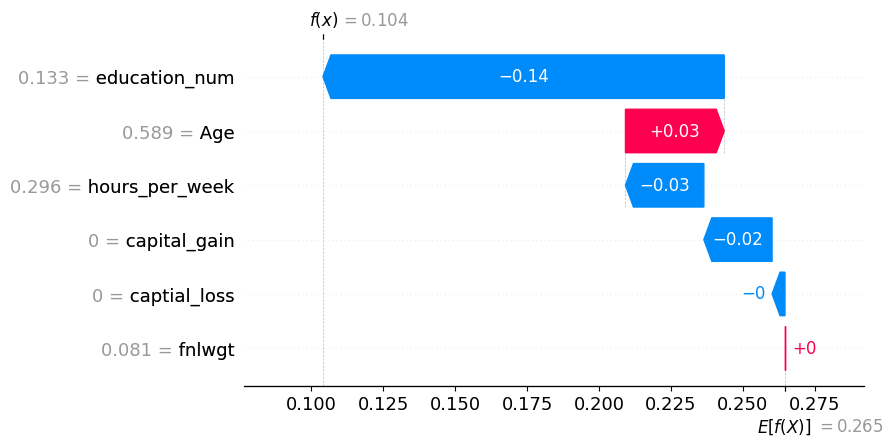

In [21]:
explainer = shap.Explainer(regressor.predict, x_train)
shap_values_decision_tree = explainer(x_train)
shap.summary_plot(shap_values_decision_tree, x_train, plot_type="bar")
shap.summary_plot(shap_values_decision_tree, x_train)
shap.plots.waterfall(shap_values_decision_tree[30], max_display=15)

### Shap importance plot

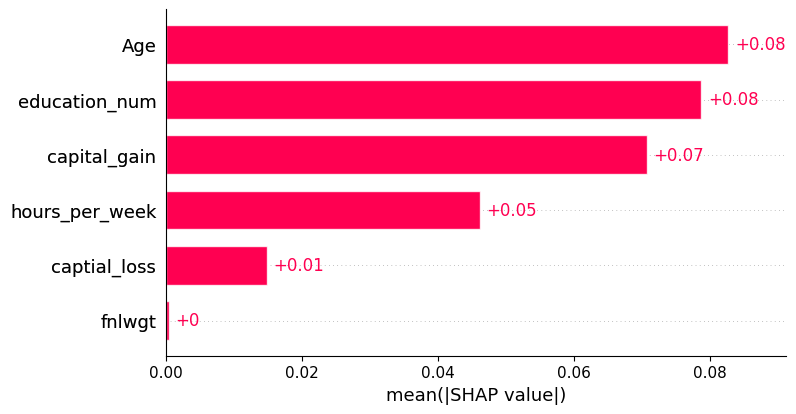

In [22]:
shap.plots.bar(shap_values_decision_tree)

### SHAP Dependance plots

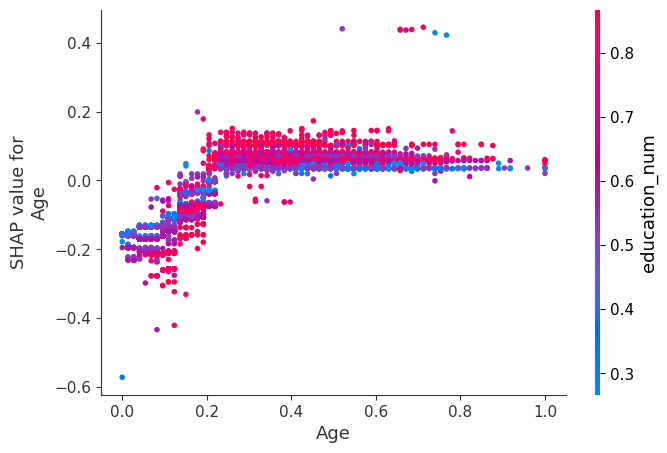

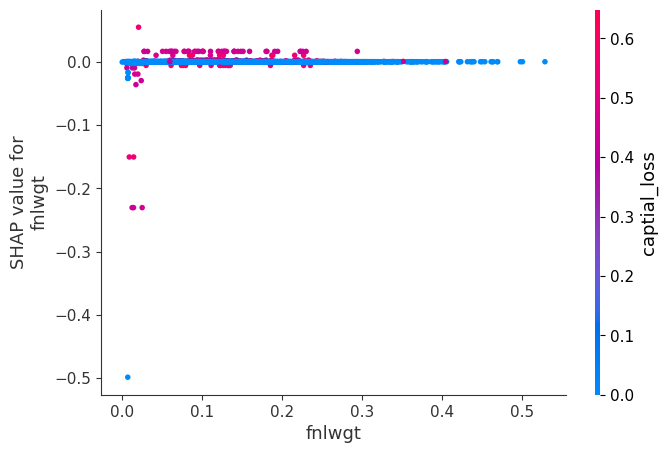

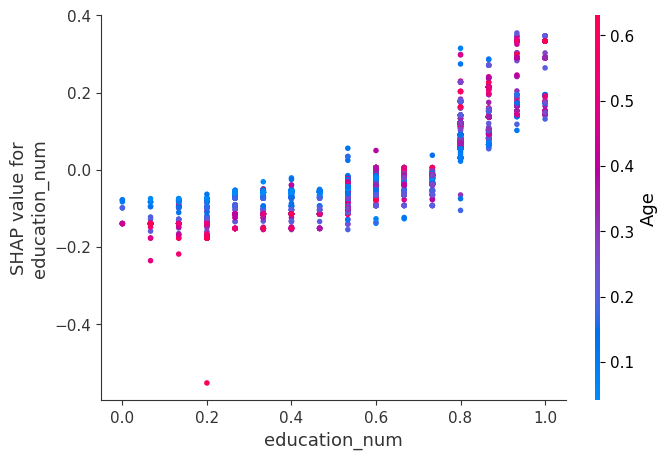

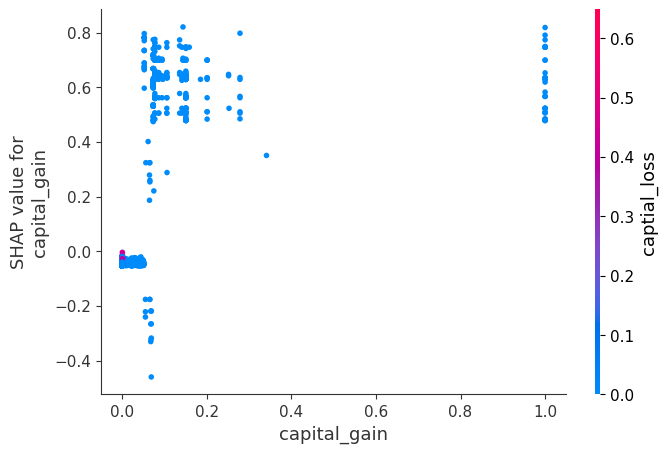

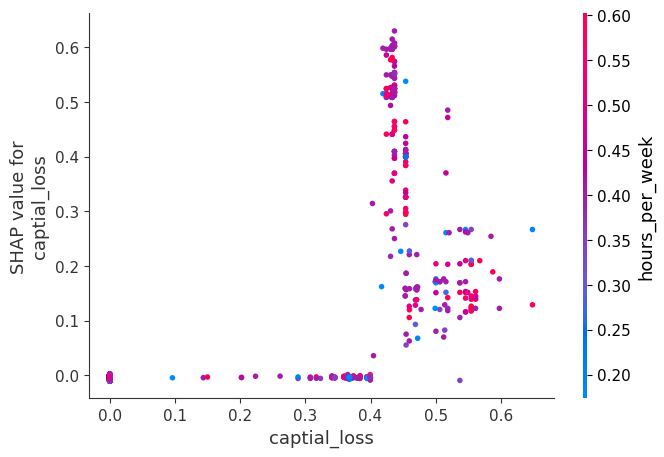

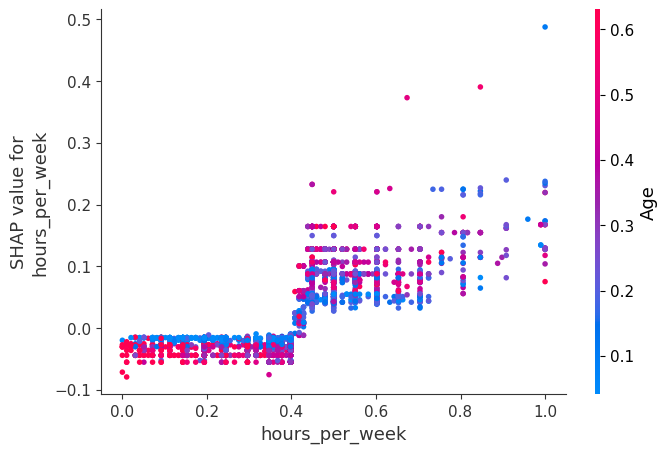

In [23]:
for i in x_train.columns:
  shap.dependence_plot(i, shap_values_decision_tree.values, x_train)

### AutoML

In [24]:
try:
  h2o.init()
except:
  print("Unexpected error occured")
  h2o.cluster().shutdown()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.18" 2023-01-17; OpenJDK Runtime Environment (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1); OpenJDK 64-Bit Server VM (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.9/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp2gyqov9g
  JVM stdout: /tmp/tmp2gyqov9g/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp2gyqov9g/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.3
H2O_cluster_version_age:,5 days
H2O_cluster_name:,H2O_from_python_unknownUser_gvbtgw
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [25]:
df = h2o.H2OFrame(data)
df_train, df_test = df.split_frame([0.75])
print(df_train)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
     Age     fnlwgt    education_num    capital_gain    captial_loss    hours_per_week    income_bracket
0.30137   0.0443019         0.8            0.0217402               0          0.397959                 0
0.452055  0.0482376         0.8            0                       0          0.122449                 0
0.287671  0.138113          0.533333       0                       0          0.397959                 0
0.150685  0.221488          0.8            0                       0          0.397959                 0
0.273973  0.184932          0.866667       0                       0          0.397959                 0
0.438356  0.100448          0.266667       0                       0          0.153061                 0
0.191781  0.0227489         0.866667       0.140841                0          0.5                      1
0.342466  0.099947          0.8            0.0517805             

In [26]:
x = df.columns
y = 'income_bracket'
x = x.remove(y)
df_train[y] = df_train[y].asfactor()
df_test[y] = df_test[y].asfactor()

aml = H2OAutoML(max_runtime_secs=222, balance_classes=True, seed=1) 
aml.train(x = x, y = y, training_frame = df_train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),6/12
# GBM base models (used / total),2/5
# XGBoost base models (used / total),2/3
# DRF base models (used / total),1/2
# DeepLearning base models (used / total),0/1
# GLM base models (used / total),1/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5


In [27]:
# Here we are printing out the leaderboard which shows which model performed best.
best_model = aml.leaderboard
print(best_model)

model_id                                                     auc    logloss     aucpr    mean_per_class_error      rmse       mse
StackedEnsemble_AllModels_2_AutoML_1_20230410_23351     0.871338   0.353616  0.740253                0.239985  0.336081  0.112951
StackedEnsemble_AllModels_1_AutoML_1_20230410_23351     0.871319   0.353987  0.740371                0.228464  0.33613   0.112984
StackedEnsemble_BestOfFamily_3_AutoML_1_20230410_23351  0.871201   0.353795  0.740155                0.241033  0.336204  0.113033
GBM_2_AutoML_1_20230410_23351                           0.871156   0.355852  0.739919                0.226979  0.336601  0.1133
GBM_3_AutoML_1_20230410_23351                           0.870771   0.355907  0.739208                0.233798  0.33665   0.113333
StackedEnsemble_BestOfFamily_2_AutoML_1_20230410_23351  0.870701   0.354836  0.739409                0.229572  0.336544  0.113262
XGBoost_3_AutoML_1_20230410_23351                       0.869196   0.433829  0.73622        

In [28]:
# For simple metric analysis we are here printing out the performance of the model that was at the top of our leaderboard.
model_imp = aml.get_best_model(algorithm="xgboost")
print(model)
model_imp.model_performance(df_test)

ModelMetricsBinomial: xgboost
** Reported on test data. **

MSE: 0.13918397325727305
RMSE: 0.3730736834155862
LogLoss: 0.41640808244328975
Mean Per-Class Error: 0.21956170757540622
AUC: 0.8808432096103329
AUCPR: 0.7561092489745319
Gini: 0.7616864192206658

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.6080427595547268
       0     1     Error    Rate
-----  ----  ----  -------  ---------------
0      5494  722   0.1162   (722.0/6216.0)
1      613   1285  0.323    (613.0/1898.0)
Total  6107  2007  0.1645   (1335.0/8114.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.608043     0.658131  133
max f2                       0.33825      0.733134  238
max f0point5                 0.793751     0.719939  68
max accuracy                 0.7149       0.852847  94
max precision                0.998261     1         0
max recall                   0.0321273    1         375
max specificity              0.998261     1         0
max absolute_mcc             0.710753     0.555986  96
max min_per_class_accuracy   0.50439      0.788288  176
max mean_per_class_accuracy  0.511239     0.789434  173
max tns                      0.998261     6216      0
max fns                      0.998261     1841      0
max fps                      0.00127621   6216      399
max tps                      0.0321273    1898      375
max tnr                      0.998261     1         0
max fnr                      0.998261     0.969968  0
max fpr                      0.00127621   1         399
max tpr                      0.0321273    1         375

Gains/Lift Table: Avg response rate: 23.39 %, avg score: 38.39 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.010106                    0.997465           4.27503    4.27503            1                0.998113    1                           0.998113            0.0432034       0.0432034                  327.503   327.503            0.0432034
2        0.0200887                   0.996126           4.27503    4.27503            1                0.99688     1                           0.9975              0.0426765       0.0858799                  327.503   327.503            0.0858799
3        0.0300715                   0.994013           4.22225    4.25751            0.987654         0.995142    0.995902                    0.996717            0.0421496       0.12803                    322.225   325.751            0.127869
4        0.0400542                   0.986826           4.27503    4.26187            1                0.991158    0.996923                    0.995332            0.0426765       0.170706                   327.503   326.187            0.170545
5        0.050037                    0.976916           4.27503    4.2645             1                0.982313    0.997537                    0.992734            0.0426765       0.213383                   327.503   326.45             0.213222
6        0.100074                    0.829462           3.4853     3.8749             0.815271         0.903141    0.906404                    0.947938            0.174394        0.387777                   248.53    287.49             0.37555
7        0.149988                    0.734919           2.31168    3.35468            0.540741         0.783729    0.784717                    0.893291            0.115385        0.503161                   131.168   235.468            0.461012
8      

In [29]:
model_imp = aml.leader
model_imp.model_performance(df_test)

ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.10508211919975151
RMSE: 0.32416372283115136
LogLoss: 0.3326443667151168
AUC: 0.8816469073318388
AUCPR: 0.7588740300674963
Gini: 0.7632938146636776
Null degrees of freedom: 8113
Residual degrees of freedom: 8107
Null deviance: 8831.225847397165
Residual deviance: 5398.152783052914
AIC: 5412.152783052914

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.36631300961214647
       0     1     Error    Rate
-----  ----  ----  -------  ---------------
0      5613  603   0.097    (603.0/6216.0)
1      671   1227  0.3535   (671.0/1898.0)
Total  6284  1830  0.157    (1274.0/8114.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.366313     0.658262  180
max f2                       0.136973     0.735219  298
max f0point5                 0.609742     0.72138   99
max accuracy                 0.511955     0.854203  128
max precision                0.994013     1         0
max recall                   0.00801072   1         390
max specificity              0.994013     1         0
max absolute_mcc             0.429969     0.559543  157
max min_per_class_accuracy   0.254981     0.788198  235
max mean_per_class_accuracy  0.256694     0.78912   234
max tns                      0.994013     6216      0
max fns                      0.994013     1868      0
max fps                      0.00102527   6216      399
max tps                      0.00801072   1898      390
max tnr                      0.994013     1         0
max fnr                      0.994013     0.984194  0
max fpr                      0.00102527   1         399
max tpr                      0.00801072   1         390

Gains/Lift Table: Avg response rate: 23.39 %, avg score: 23.94 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.010106                    0.990614           4.27503    4.27503            1                0.99252     1                           0.99252             0.0432034       0.0432034                  327.503   327.503            0.0432034
2        0.0200887                   0.987018           4.27503    4.27503            1                0.988847    1                           0.990695            0.0426765       0.0858799                  327.503   327.503            0.0858799
3        0.0300715                   0.980405           4.22225    4.25751            0.987654         0.984161    0.995902                    0.988526            0.0421496       0.12803                    322.225   325.751            0.127869
4        0.0400542                   0.964604           4.27503    4.26187            1                0.973449    0.996923                    0.984768            0.0426765       0.170706                   327.503   326.187            0.170545
5        0.050037                    0.937638           4.27503    4.2645             1                0.953453    0.997537                    0.978521            0.0426765       0.213383                   327.503   326.45             0.213222
6        0.100074                    0.641941           3.4853     3.8749             0.815271         0.783976    0.906404                    0.881248            0.174394        0.387777                   248.53    287.49             0.37555
7        0.149988                    0.51059            2.43835    3.39684            0.57037          0.5722      0.79457

In [30]:
# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head() 

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_2_AutoML_1_20230410_23351,0.871338,0.353616,0.740253,0.239985,0.336081,0.112951
StackedEnsemble_AllModels_1_AutoML_1_20230410_23351,0.871319,0.353987,0.740371,0.228464,0.33613,0.112984
StackedEnsemble_BestOfFamily_3_AutoML_1_20230410_23351,0.871201,0.353795,0.740155,0.241033,0.336204,0.113033
GBM_2_AutoML_1_20230410_23351,0.871156,0.355852,0.739919,0.226979,0.336601,0.1133
GBM_3_AutoML_1_20230410_23351,0.870771,0.355907,0.739208,0.233798,0.33665,0.113333
StackedEnsemble_BestOfFamily_2_AutoML_1_20230410_23351,0.870701,0.354836,0.739409,0.229572,0.336544,0.113262
XGBoost_3_AutoML_1_20230410_23351,0.869196,0.433829,0.73622,0.241616,0.381871,0.145826
GBM_4_AutoML_1_20230410_23351,0.86593,0.361964,0.731979,0.237519,0.339338,0.11515
GBM_5_AutoML_1_20230410_23351,0.864235,0.394947,0.726033,0.23934,0.353642,0.125062
StackedEnsemble_BestOfFamily_1_AutoML_1_20230410_23351,0.863071,0.363953,0.724353,0.239575,0.341544,0.116652


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

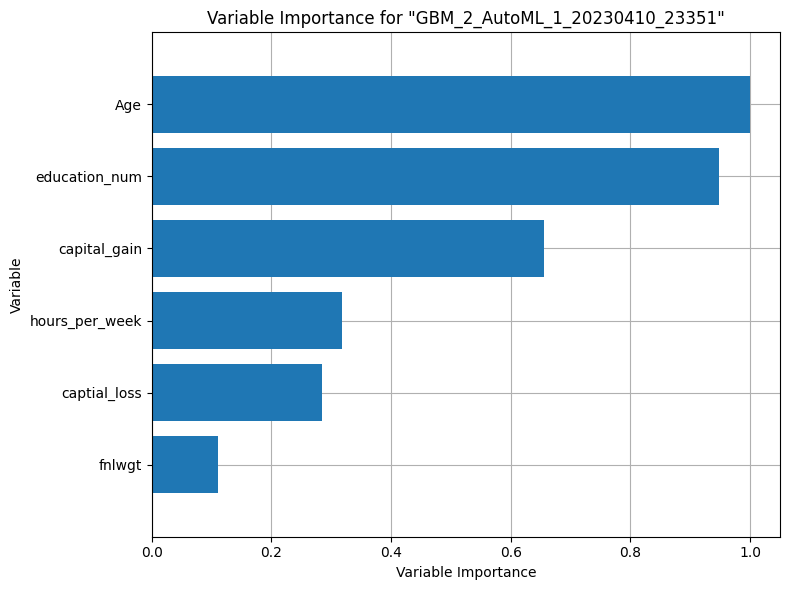

In [31]:
%matplotlib inline
#best_model.varimp_plot()
explain_model = aml.explain(frame = df_test, figsize = (8,6),include_explanations=['varimp', ])

In [32]:
# For simple metric analysis we are here printing out the performance of the model that was at the top of our leaderboard.
model_imp = aml.get_best_model(algorithm="xgboost")
print(model)
model_imp.model_performance(df_test)

ModelMetricsBinomial: xgboost
** Reported on test data. **

MSE: 0.13918397325727305
RMSE: 0.3730736834155862
LogLoss: 0.41640808244328975
Mean Per-Class Error: 0.21956170757540622
AUC: 0.8808432096103329
AUCPR: 0.7561092489745319
Gini: 0.7616864192206658

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.6080427595547268
       0     1     Error    Rate
-----  ----  ----  -------  ---------------
0      5494  722   0.1162   (722.0/6216.0)
1      613   1285  0.323    (613.0/1898.0)
Total  6107  2007  0.1645   (1335.0/8114.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.608043     0.658131  133
max f2                       0.33825      0.733134  238
max f0point5                 0.793751     0.719939  68
max accuracy                 0.7149       0.852847  94
max precision                0.998261     1         0
max recall                   0.0321273    1         375
max specificity              0.998261     1         0
max absolute_mcc             0.710753     0.555986  96
max min_per_class_accuracy   0.50439      0.788288  176
max mean_per_class_accuracy  0.511239     0.789434  173
max tns                      0.998261     6216      0
max fns                      0.998261     1841      0
max fps                      0.00127621   6216      399
max tps                      0.0321273    1898      375
max tnr                      0.998261     1         0
max fnr                      0.998261     0.969968  0
max fpr                      0.00127621   1         399
max tpr                      0.0321273    1         375

Gains/Lift Table: Avg response rate: 23.39 %, avg score: 38.39 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.010106                    0.997465           4.27503    4.27503            1                0.998113    1                           0.998113            0.0432034       0.0432034                  327.503   327.503            0.0432034
2        0.0200887                   0.996126           4.27503    4.27503            1                0.99688     1                           0.9975              0.0426765       0.0858799                  327.503   327.503            0.0858799
3        0.0300715                   0.994013           4.22225    4.25751            0.987654         0.995142    0.995902                    0.996717            0.0421496       0.12803                    322.225   325.751            0.127869
4        0.0400542                   0.986826           4.27503    4.26187            1                0.991158    0.996923                    0.995332            0.0426765       0.170706                   327.503   326.187            0.170545
5        0.050037                    0.976916           4.27503    4.2645             1                0.982313    0.997537                    0.992734            0.0426765       0.213383                   327.503   326.45             0.213222
6        0.100074                    0.829462           3.4853     3.8749             0.815271         0.903141    0.906404                    0.947938            0.174394        0.387777                   248.53    287.49             0.37555
7        0.149988                    0.734919           2.31168    3.35468            0.540741         0.783729    0.784717                    0.893291            0.115385        0.503161                   131.168   235.468            0.461012
8      

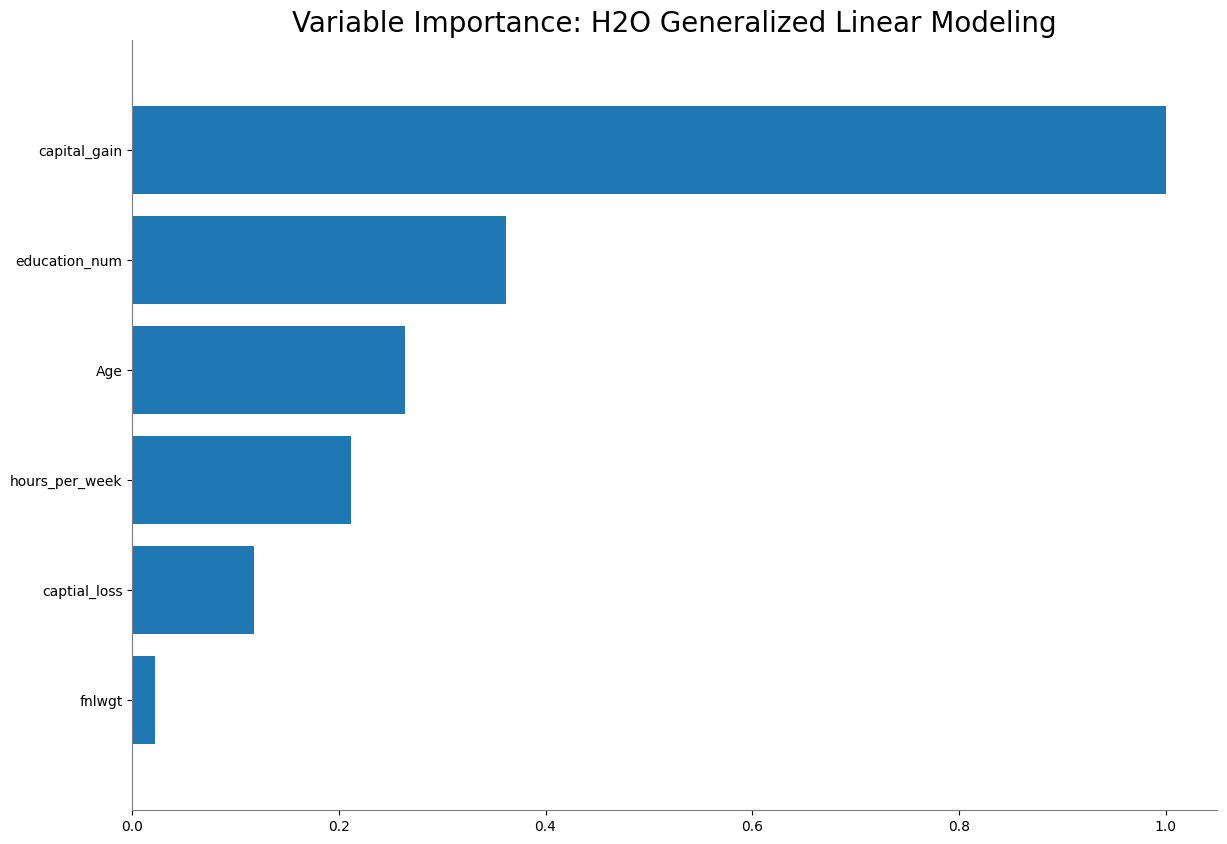

<Figure size 640x480 with 0 Axes>

In [33]:
model = aml.get_best_model(algorithm='glm')
model.varimp_plot()

## Shap Analysis of AutoML

To conduct a more thorough analysis, we cannot use the top performer from our leaderboard, which is the Stacked Ensemble model. This is due to the fact that the ensemble is comprised of various models predicting different values and ultimately making a decision based on those values.

Therefore, we will employ the Generalized Linear Model (GLM) to perform the SHAP analysis for a more accurate interpretation.

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
DRF_1_AutoML_1_20230410_23351,0.972025,0.217878,0.930027,0.114114,0.257449,0.0662798,2556,0.022985,DRF
XRT_1_AutoML_1_20230410_23351,0.964583,0.224937,0.912047,0.129862,0.263781,0.0695805,868,0.004962,DRF
XGBoost_1_AutoML_1_20230410_23351,0.921684,0.358462,0.819827,0.174203,0.341593,0.116686,3222,0.007209,XGBoost
XGBoost_2_AutoML_1_20230410_23351,0.92113,0.360334,0.816598,0.184782,0.343416,0.117934,1590,0.008324,XGBoost
GBM_4_AutoML_1_20230410_23351,0.917421,0.303144,0.813176,0.186475,0.310683,0.0965239,2601,0.017893,GBM
StackedEnsemble_BestOfFamily_1_AutoML_1_20230410_23351,0.90524,0.318446,0.792328,0.194895,0.317855,0.101032,3738,0.030531,StackedEnsemble
GBM_1_AutoML_1_20230410_23351,0.905,0.318409,0.792309,0.197587,0.318424,0.101394,5433,0.02725,GBM
GBM_3_AutoML_1_20230410_23351,0.901192,0.320681,0.787731,0.206536,0.319938,0.102361,2454,0.017766,GBM
StackedEnsemble_AllModels_1_AutoML_1_20230410_23351,0.900685,0.318704,0.787495,0.20972,0.319194,0.101885,2542,0.043686,StackedEnsemble
StackedEnsemble_BestOfFamily_2_AutoML_1_20230410_23351,0.899282,0.320656,0.785346,0.208722,0.320115,0.102474,2301,0.030045,StackedEnsemble


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_AllModels_2_AutoML_1_20230410_23351

,0,1,Error,Rate
0,16463.0,2041.0,0.1103,(2041.0/18504.0)
1,1912.0,4031.0,0.3217,(1912.0/5943.0)
Total,18375.0,6072.0,0.1617,(3953.0/24447.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

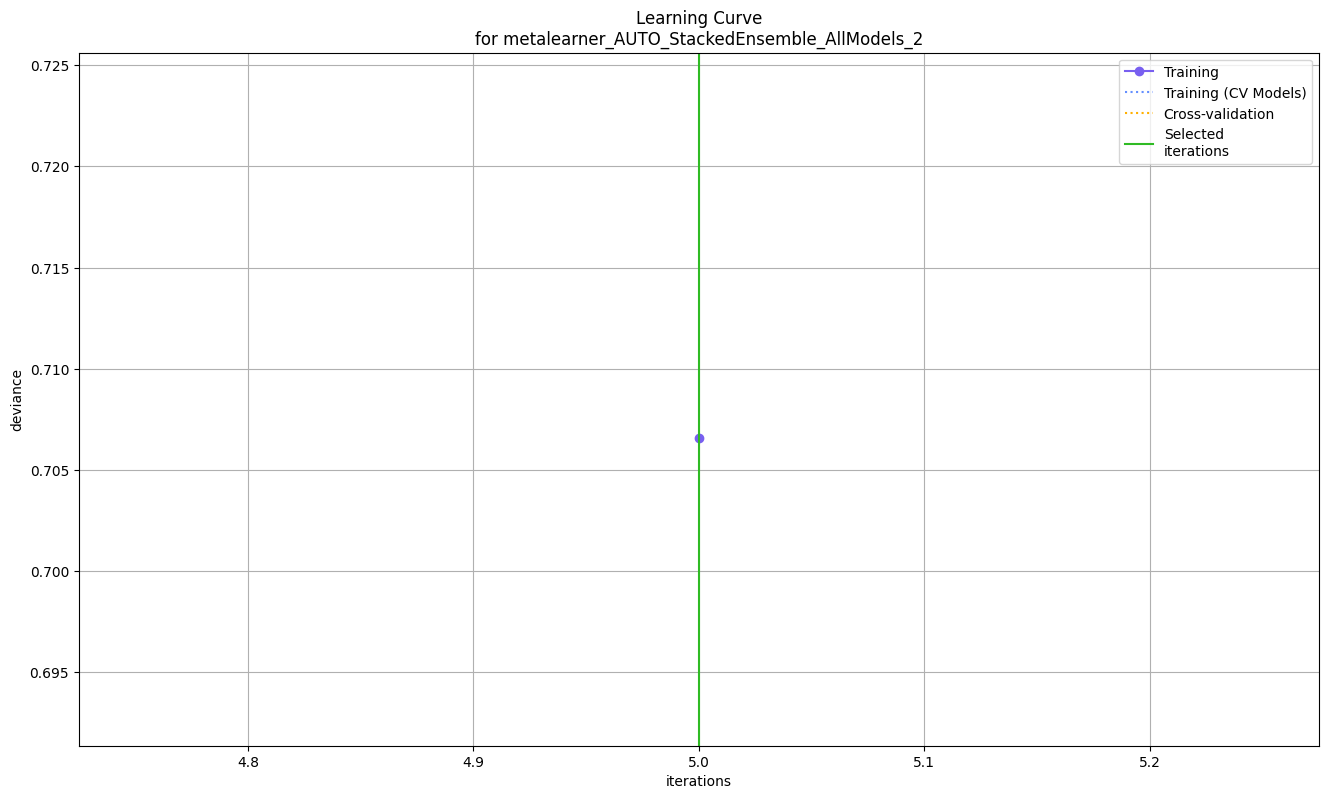

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

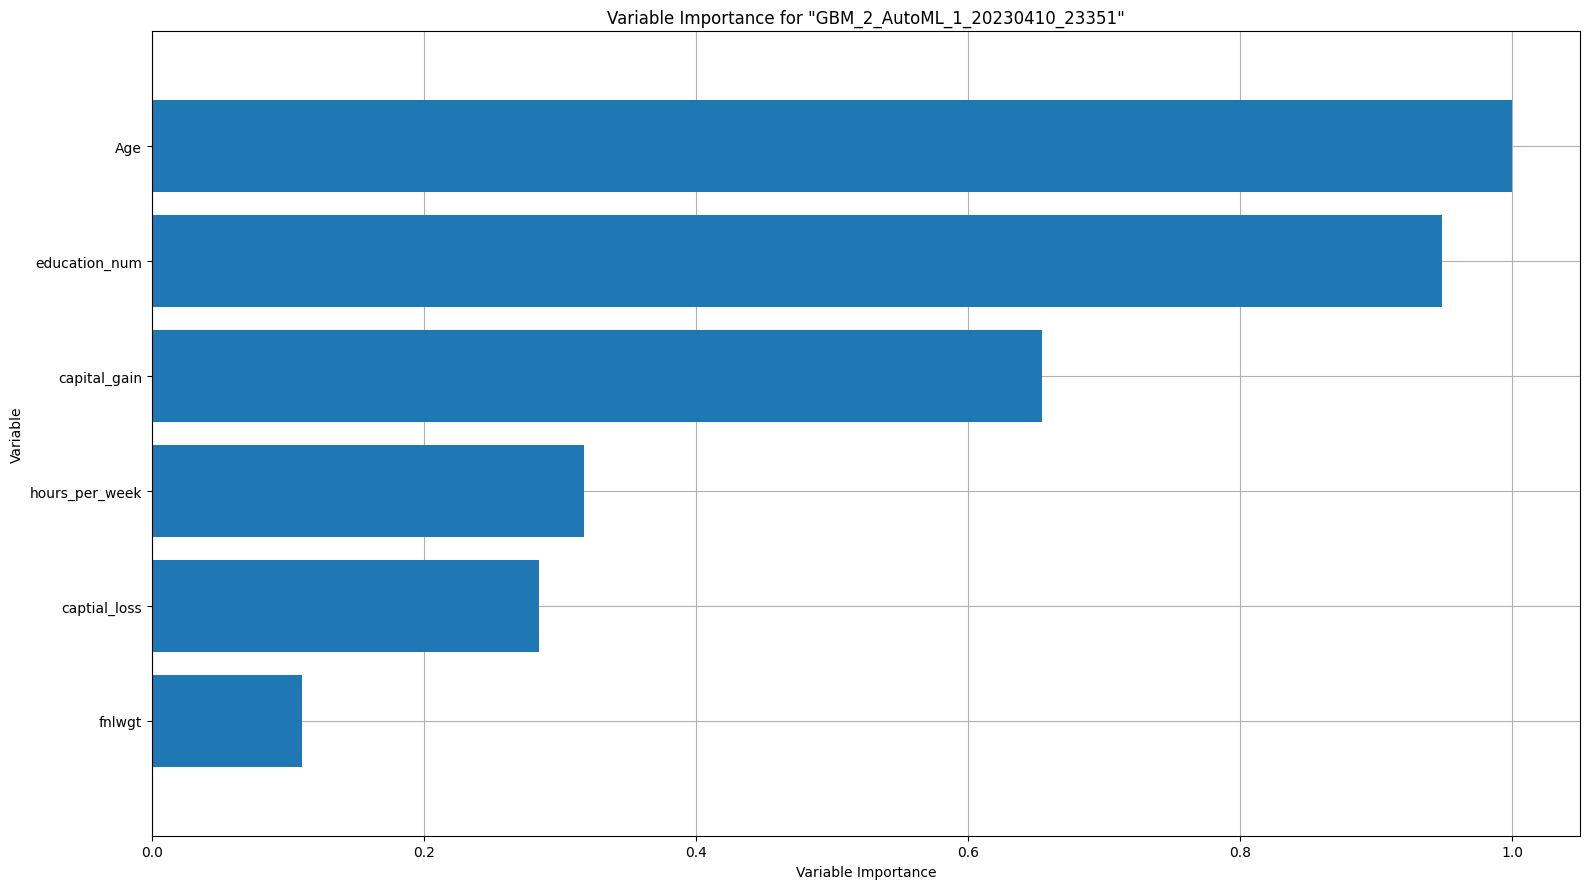

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

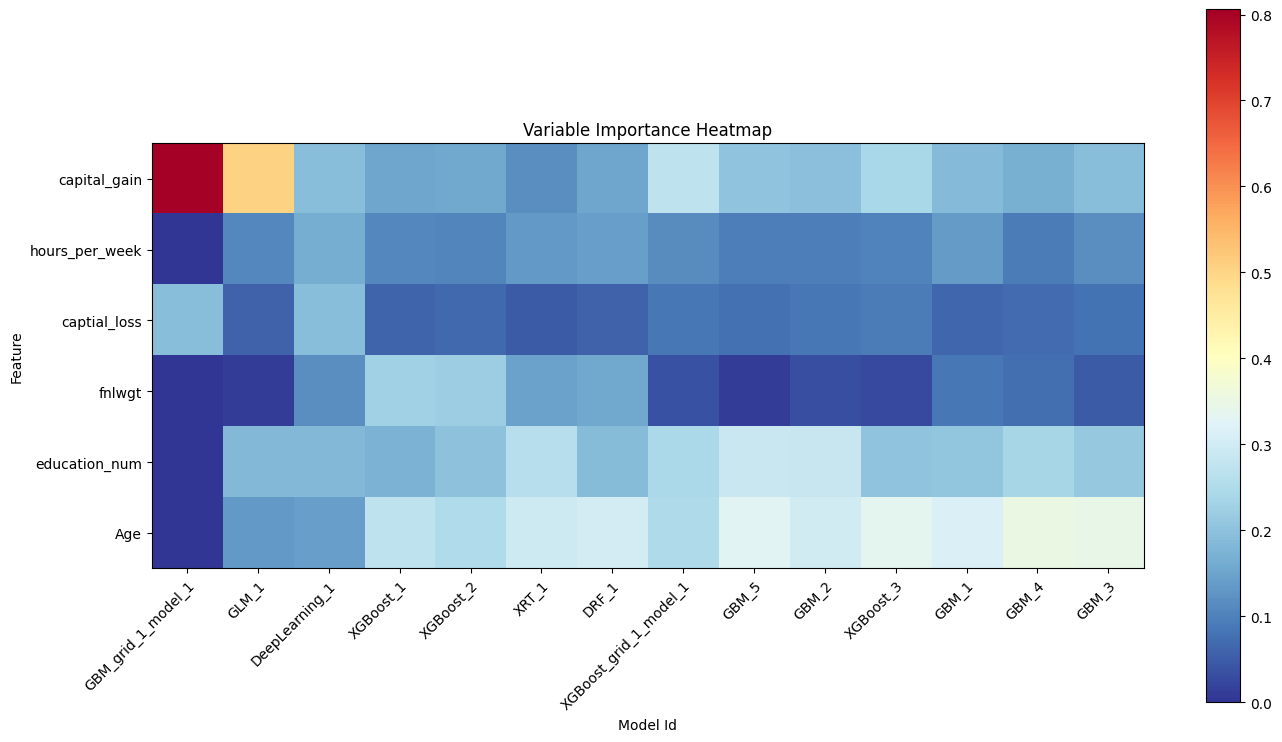

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

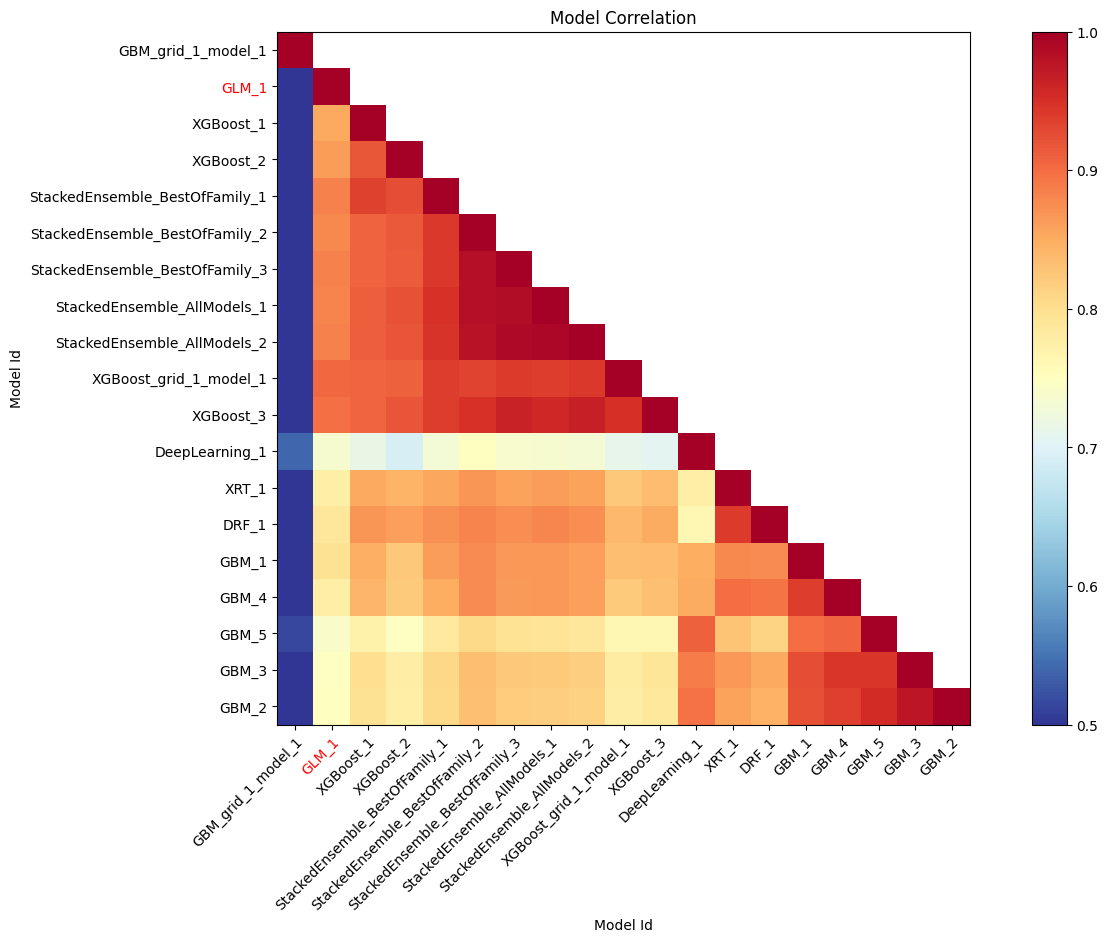

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

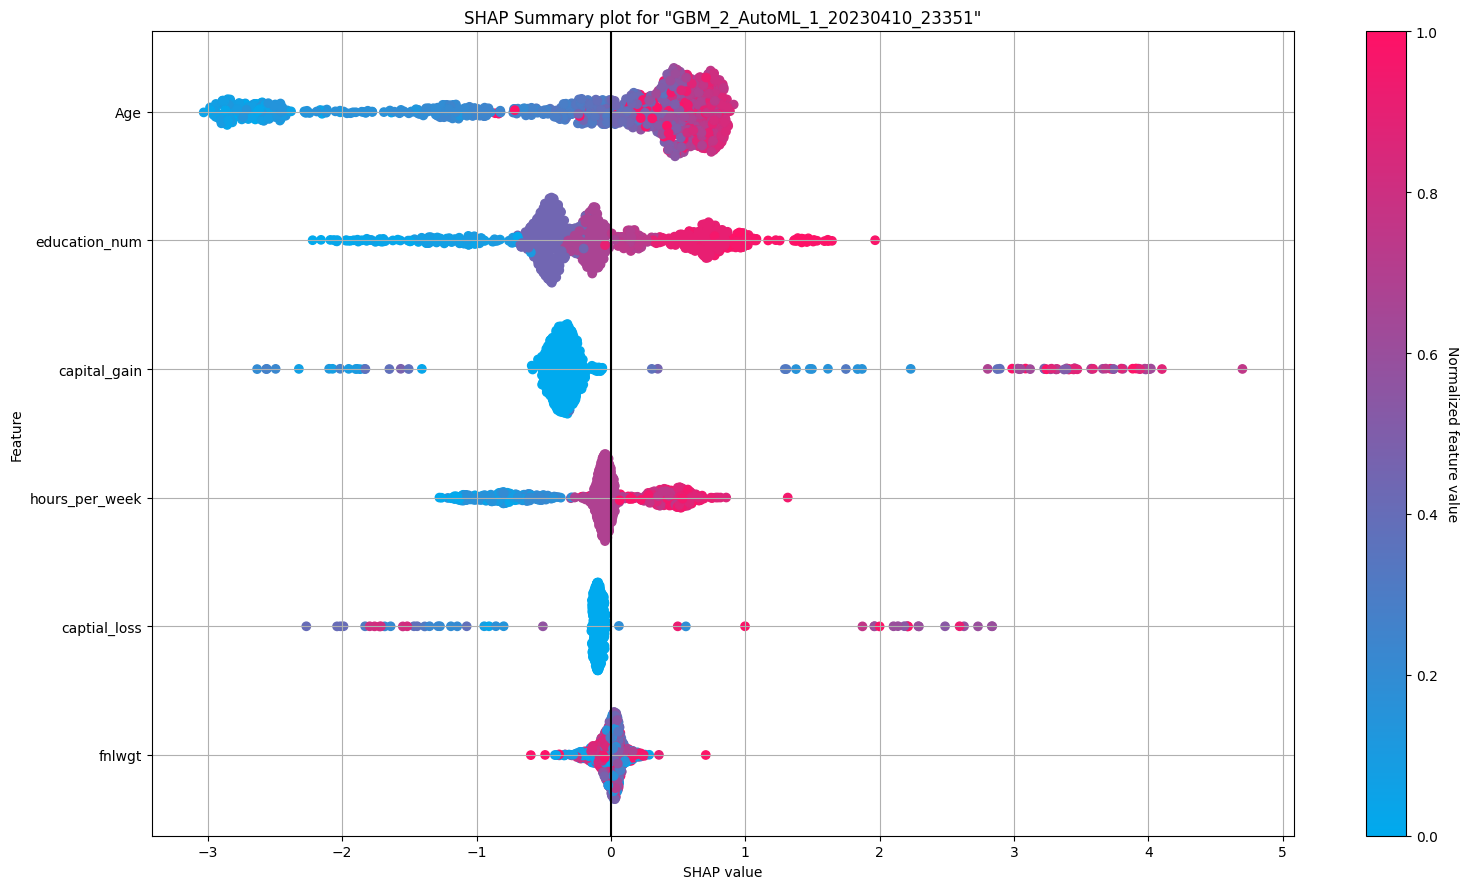

In [34]:
#model.explain(df_train)
exa = aml.explain(df_train, exclude_explanations=['pdp'])

## **Hyperparamer Tuning**

A low residual deviance indicates that the model fits the data well and explains most of the variation in the response variable. It suggests that the model's predictions closely match the actual values in the data. 
Residual deviance is lowest at 0.2995913 for 

learn_rate : 0.09

max_depth : 8.0

sample_rate : 0.6

col_sample_rate :0.9

In [42]:
from h2o.grid.grid_search import H2OGridSearch
glm_parameters = {
    "learn_rate": [i * 0.01 for i in range(1, 11)],
    "max_depth": list(range(2, 11)),
    "sample_rate": [i * 0.1 for i in range(5, 11)],
    "col_sample_rate": [i * 0.1 for i in range(1, 11)],
}

search_criteria = {"strategy": "RandomDiscrete", "max_models": 30, "seed": 1}
glm_grid = H2OGridSearch(
    model=H2OGradientBoostingEstimator,
    grid_id="gbm_grid_search",
    hyper_params=glm_parameters,
    search_criteria=search_criteria,
)
glm_grid.train(x=x, y=y, training_frame=df_train, ntrees=100, seed=1)

gbm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


,col_sample_rate,learn_rate,max_depth,sample_rate,model_ids,logloss
,0.9,0.09,9.0,0.6000000,gbm_grid_search_model_3,0.2995913
,0.5,0.1,9.0,1.0,gbm_grid_search_model_7,0.3018009
,0.8,0.06,9.0,0.6000000,gbm_grid_search_model_30,0.3181024
,0.9,0.03,10.0,0.5,gbm_grid_search_model_21,0.3329072
,0.8,0.03,9.0,0.9,gbm_grid_search_model_8,0.3369226
,0.5,0.05,7.0,0.9,gbm_grid_search_model_2,0.3387495
,0.4,0.08,6.0,0.9,gbm_grid_search_model_28,0.3392295
,0.9,0.1,4.0,0.7000000,gbm_grid_search_model_15,0.3434078
,0.1,0.07,7.0,0.8,gbm_grid_search_model_9,0.3466231
,0.6000000,0.1,4.0,1.0,gbm_grid_search_model_22,0.3469722


### What did you learn?
The article above provided us with an understanding of various topics such as data cleaning, selecting relevant features, determining variable importance, different types of models, evaluating model performance metrics and output, enhancing model performance through optimization, and interpreting a model's output based on the given input.


###How well did it work?

From the information presented above, we utilized the OLS summary to determine whether the null hypothesis was valid or not. Since we observed a significant relationship, we were able to make predictions about attrition based on the input variables. To evaluate the effectiveness of our model, we employed the Root Mean Squared Error metric and conducted tests using three different approaches: 

1)Linear regression

2)Decision tree

3)AutoML

### References
1) https://docs.h2o.ai/h2o/latest-stable/h2o-docs/grid-search.html

2) https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d

3) https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/Full_ML_Report/Wine-Quality-Analysis.ipynb

4) https://www.geeksforgeeks.org/how-to-create-a-residual-plot-in-python/


## **MIT License**
Copyright (c) 2023 Aditya Venkateswararao Mattaparthi

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.